<a href="https://colab.research.google.com/github/ef1s/ML-Econ441b-SY/blob/main/%E4%BF%A1%E7%94%A8%E5%8D%A1%E6%AC%BA%E8%AF%88%E4%BA%A4%E6%98%93%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 背景
#### 有一批交易数据，数据总量达到28万多条。其中，正常交易数据量占比99.83%，欺诈交易数据量仅占比0.17%，此案例属于一个典型的不平衡数据案例。

### 2 目标
#### 训练出一个模型，能够判断出欺诈交易数据。

### 方案三：
#### 基于TF的DL（深度学习）解决方法

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,recall_score
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTEENN


## Preprocess-data cleanig & Features Selection

In [ ]:
# 加载数据文件
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
# 默认显示前5行
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


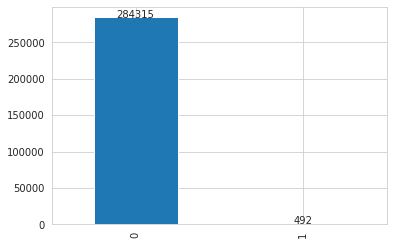

In [ ]:
im = df['Class'].value_counts()
ax = im.plot(kind='bar')
for i, v in enumerate(im.values):
    ax.text(i, v+50, str(v), ha='center')
plt.show()

In [ ]:
# # 数据表中的大多数列的数据已经归一化，接下来对Amount进行归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df['Amount'] = MinMaxScaler().fit_transform(df['Amount'].values.reshape(-1,1)) # 金额归一化
# df['scaled_hour']= MinMaxScaler().fit_transform(df['hour'].values.reshape(-1,1)) # 时间归一化

# df.drop(['Amount','hour'], axis=1, inplace=True) # 删除原始的数据列

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


Text(0.5, 1.0, 'Normal')

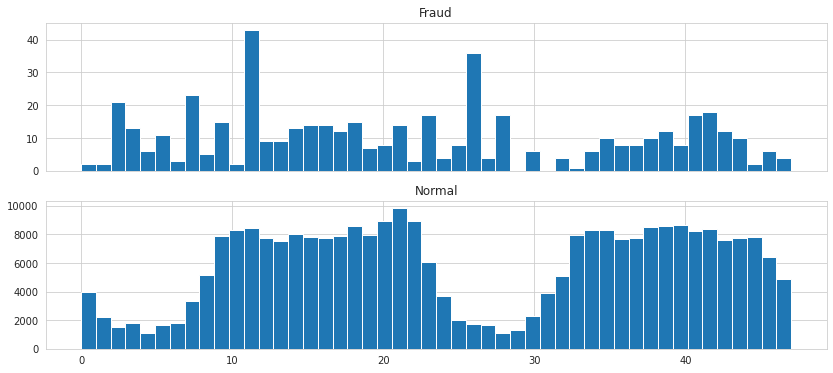

In [ ]:
data=df.copy()
data['hour'] = data['Time'].apply(lambda x : divmod(x, 3600)[0])

fraud_data = data[data['Class']==1]
normal_data = data[data['Class']==0]

f, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(14,6))
ax1.hist(fraud_data['hour'], bins=48)
ax1.set_title('Fraud')
ax2.hist(normal_data['hour'], bins=48)
ax2.set_title('Normal')

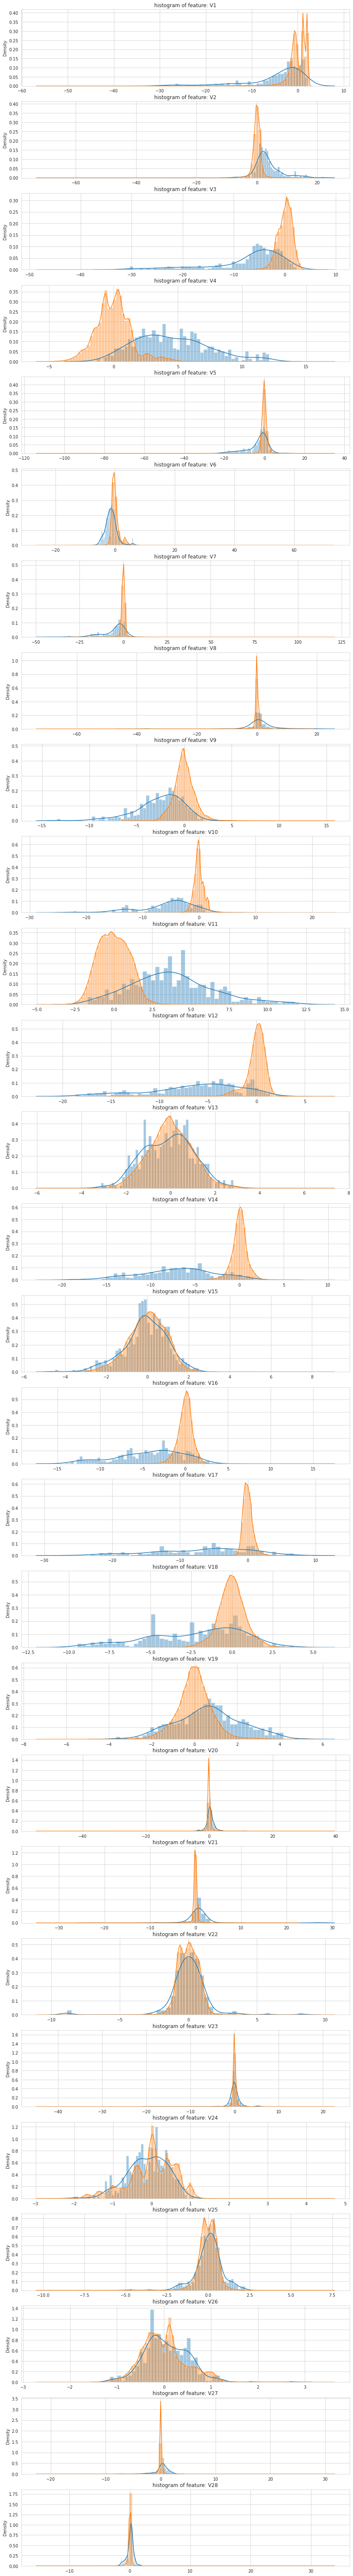

In [ ]:
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(14, 28*4))
gs = gridspec.GridSpec(28,1)
for i, col in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(fraud_data[col], bins=50)
    sns.distplot(normal_data[col], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(col))
plt.savefig('fraud vs normal.png')


In [ ]:
# V8,V13,V15,V20,V21,V22,V23,V24,V25,V26,V27,V28分布差异不明显，选择剔除
data_new = data.drop(['V8','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time'], axis=1)
data_new.shape

(284807, 19)

Text(0.5, 1.0, 'Normal')

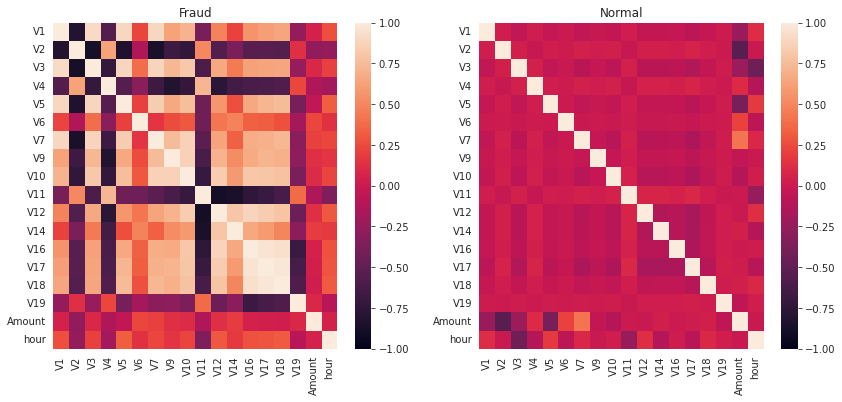

In [ ]:
fraud_data_new = data_new[data_new['Class']==1]
normal_data_new = data_new[data_new['Class']==0]

f, [ax1, ax2] = plt.subplots(1,2,figsize=(14,6))
sns.heatmap(fraud_data_new.drop('Class', 1).corr(), ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Fraud')
sns.heatmap(normal_data_new.drop('Class', 1).corr(), ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Normal')

In [ ]:
data_new.dropna(inplace=True)

0.001
[-0.00188805  0.001929   -0.00484984  0.00341516 -0.00233256 -0.00079697
 -0.00563247 -0.00286569 -0.00742815  0.00534121 -0.00982874 -0.0120182
 -0.00801194 -0.0145766  -0.00410009  0.00026534  0.        ]
Lasso picked 16 variables and eliminated the other 1 variables
0.02936157189160364


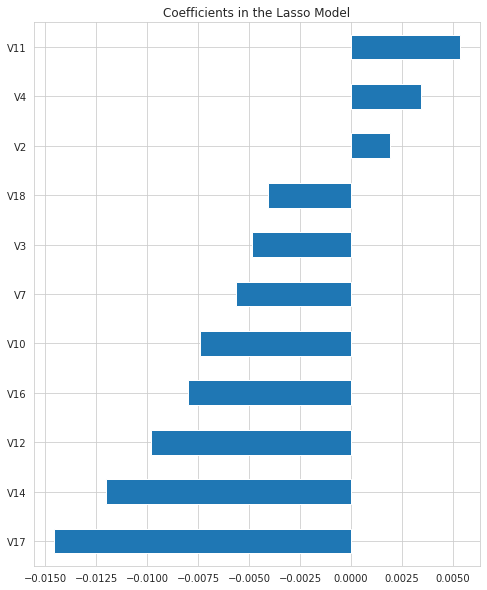

In [ ]:
##进一步做一下特征筛选
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


      # Load the train file into a dataframe

X_train =data_new.drop(['Class','hour'],axis=1)
y = data_new['Class']



def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 6))
    return(rmse)

#调用LassoCV函数，并进行交叉验证，默认cv=3
model_lasso = LassoCV(alphas = [0.1,1,0.001,0.0001, 0.0005]).fit(X_train, y)

#模型所选择的最优正则化参数alpha
print(model_lasso.alpha_)

#各特征列的参数值或者说权重参数，为0代表该特征被模型剔除了
print(model_lasso.coef_)

#输出看模型最终选择了几个特征向量，剔除了几个特征向量
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

#输出所选择的最优正则化参数情况下的残差平均值，因为是3折，所以看平均值
print(rmse_cv(model_lasso).mean())


#画出特征变量的重要程度，这里面选出前8个重要，后3个不重要的举例
imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(3)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [ ]:
###异常值分析
# 特征清洗：异常值清理用用箱图；
# 分为两步走，一步是单列异常值处理，
# 第二步是多列分组异常值处理
def remove_filers_with_boxplot(data):
    p = data.boxplot(return_type='dict')
    plt.xticks(rotation=60)
    for index,value in enumerate(data.columns):
        try:
  # 获取异常值
            fliers_value_list = p['fliers'][index].get_ydata()
        except:pass
      # 删除异常值
        for flier in fliers_value_list:
            data = data[data.loc[:,value] != flier]
    return data

In [ ]:
data_new

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.005824,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,0.000105,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.014739,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.004807,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.002724,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.000030,0,47.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.000965,0,47.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.002642,0,47.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.000389,0,47.0


In [ ]:
##随机森林特征选择
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_train,y,test_size=0.3)

lgb_clf = RandomForestClassifier()
lgb_model = lgb_clf.fit(train_x,train_y)


<Figure size 1440x1440 with 0 Axes>

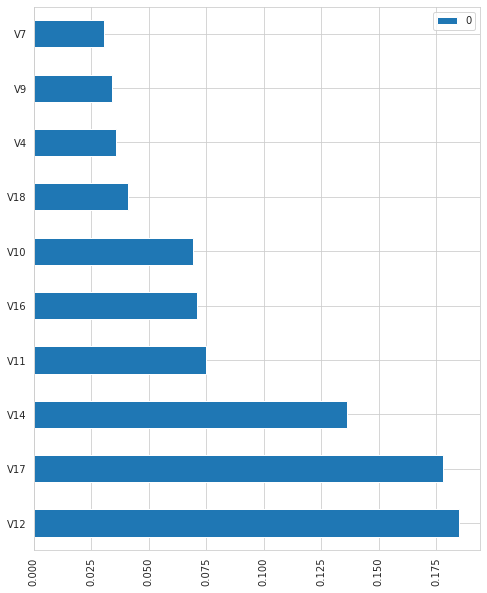

In [ ]:
lgb_predictors = [i for i in train_x.columns]###LGB特征排序结果
lgb_feat_imp = pd.Series(lgb_model.feature_importances_, lgb_predictors).sort_values(ascending=False)
plt.figure(figsize=(20,20))
pd.DataFrame(lgb_feat_imp).iloc[:10,:].plot(kind = "barh")
plt.xticks(rotation=90)
plt.show()

In [ ]:
importances = lgb_model.feature_importances_# set the threshold as the 50th percentile of feature importance scores
threshold = np.percentile(importances, 50)

important_indices = np.where(importances > threshold)[0]

# get the names of the important features
important_features = data_new.columns[important_indices]
important_features


Index(['V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')

In [ ]:
dataSet=data_new[list(lgb_feat_imp[:8].index)]
dataSet

,V12,V17,V14,V11,V16,V10,V18,V4
0,-0.617801,0.207971,-0.311169,-0.551600,-0.470401,0.090794,0.025791,1.378155
1,1.065235,-0.114805,-0.143772,1.612727,0.463917,-0.166974,-0.183361,0.448154
2,0.066084,1.109969,-0.165946,0.624501,-2.890083,0.207643,-0.121359,0.379780
3,0.178228,-0.684093,-0.287924,-0.226487,-1.059647,-0.054952,1.965775,-0.863291
4,0.538196,-0.237033,-1.119670,-0.822843,-0.451449,0.753074,-0.038195,0.403034
...,...,...,...,...,...,...,...,...
284802,2.711941,1.991691,4.626942,-1.593105,1.107641,4.356170,0.510632,-2.066656
284803,0.915802,-0.025693,-0.675143,-0.150189,-0.711757,-0.975926,-1.221179,-0.738589
284804,0.063119,0.313502,-0.510602,0.411614,0.140716,-0.484782,0.395652,-0.557828
284805,-0.962886,0.509928,0.449624,-1.933849,-0.608577,-0.399126,1.113981,0.689799


In [ ]:
list(dataSet.columns)


['V12', 'V17', 'V14', 'V11', 'V16', 'V10', 'V18', 'V4']

## Dealing with data imbalance

### Oversampling

In [ ]:
# X = df.drop('Class', axis=1) # 数据集
# y = df['Class'] # 标签
# X_=pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)

X=dataSet.copy()
y=df.iloc[:,-1]
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (284807, 8)
y shape :  (284807,)


In [ ]:
# 数据集分离：Train 和 Test
from sklearn.model_selection import train_test_split

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.25)

In [ ]:
##对训练数据进行采样
##implement Oversampling strategy
smote=SMOTE()
smo_X,smo_y=smote.fit_resample(X_new_train,y_new_train)
smo_X.shape

(426450, 8)

In [ ]:
X_new_train=smo_X.copy()
y_new_train=smo_y.copy()
Counter(y_new_train)

Counter({0: 213225, 1: 213225})

### Undersampling

In [ ]:
normal_data_index = data_new[data_new['Class']==0].index
fruad_data_num = len(data_new[data_new['Class']==1])
random_normal = np.random.choice(normal_data_index,fruad_data_num,replace=False)
len(random_normal)

492

In [ ]:
fruad_data_index = data_new[data_new['Class']==1].index
us_indices = np.concatenate([fruad_data_index, random_normal])
us_dataset = data_new.iloc[us_indices,:].copy()


In [ ]:
X_us = us_dataset.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V18', 'V19', 'Class', 'hour', 'Amount'], axis=1)
y_us = us_dataset['Class']

In [ ]:
X_new_train2, X_new_test2, y_new_train2, y_new_test2 = train_test_split(X_us, y_us, test_size=0.25)
Counter(y_new_train2)

Counter({0: 370, 1: 368})

## Models Building

In [ ]:
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, f1_score, precision_score


## 1). KNN

In [ ]:
def knn_hyperparam_tuning(X_new_train, y_new_train):
    param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
    knn_clf = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_new_train, y_new_train)
    return grid_search.best_params_

## 2). Random Forest Classifier

In [ ]:
def rf_hyperparam_tuning(X_new_train, y_new_train):
    param_grid = {'n_estimators': [100, 150, 200],
                  'max_depth': [None, 5, 10],
                  'max_features': ['sqrt', 'log2', 0.5]}
    rf_clf = RandomForestClassifier()
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_new_train, y_new_train)
    return grid_search.best_params_

## 3). SVC Classifier

In [ ]:
def svc_hyperparam_tuning(X_new_train, y_new_train):
    param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'poly','sigmod'],
                  'gamma': ['scale', 'auto']}
    svc_clf = SVC()
    grid_search = GridSearchCV(svc_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_new_train, y_new_train)
    return grid_search.best_params_

## 4). Logisitc Regressor

In [ ]:
def logreg_hyperparam_tuning(X_new_train, y_new_train):
    param_grid = {'C': [0.1, 1, 10],
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'saga']}
    logreg_clf = LogisticRegression()
    grid_search = GridSearchCV(logreg_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_new_train, y_new_train)
    return grid_search.best_params_

## 5). XBG

In [ ]:
def xgb_hyperparam_tuning(X_new_train, y_new_train):
    param_grid = {'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [3, 5, 7],
                  'n_estimators': [50, 100, 200]}
    xgb_clf = XGBClassifier()
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_new_train, y_new_train)
    return grid_search.best_params_

## 6). DecisionTree Classifier

In [ ]:
def dt_hyperparam_tuning(X_train, y_train):
    param_grid = {'max_depth': [2, 6, 10, 14],
                  'min_samples_leaf': [1, 2, 4, 8]}
    dt_clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(dt_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

## 7). RNN/LSTM

In [ ]:
def rnn_hyperparam_tuning(X_train, y_train):
    def create_model(hidden_layers=1, units=64):
        model = Sequential()
        model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
        for i in range(hidden_layers):
            model.add(Dense(units, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    model = KerasClassifier(build_fn=create_model, verbose=0)
    param_grid = {'units': [32, 64],
            'hidden_layers': [2, 3],
            'batch_size': [32, 64],
            'epochs': [10, 25]}
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
    
    # reshape input data to match the expected shape of LSTM layer
    X_train_array = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    
    grid_search.fit(X_train_array, y_train)
    return grid_search.best_params_



## Model Evaluation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_models(models, datasets):
    for dataset_name, dataset in datasets.items():
        X_train, y_train, X_test, y_test = dataset
        print(f"Evaluating models on {dataset_name} dataset:")
        for model_name, model in models.items():
            print(f"\n{model_name}:")
            best_params = model['best_params']
            model_obj = model['model'](**best_params)
            model_obj.fit(X_train, y_train)
            y_pred = model_obj.predict(X_test)
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print("F1 Score:", f1_score(y_test, y_pred))
            print("Precision:", precision_score(y_test, y_pred))
            print("Recall:", recall_score(y_test, y_pred))
            print(best_params)
            cm = confusion_matrix(y_test, y_pred)

            # plot confusion matrix
            fig, ax = plt.subplots()
            im = ax.imshow(cm, cmap='Blues')

            # add title and labels
            ax.set_title(f"{model_name} Confusion Matrix ({dataset_name})")
            ax.set_xlabel('Predicted Labels')
            ax.set_ylabel('True Labels')
            ax.set_xticks([0, 1])
            ax.set_yticks([0, 1])
            ax.xaxis.set(ticklabels=['Negative', 'Positive'])
            ax.yaxis.set(ticklabels=['Negative', 'Positive'])
            ax.tick_params(axis='both', which='major', labelsize=10)

            # add annotations
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=12)

            plt.show()

In [ ]:
from keras.saving.legacy.model_config import model_from_config
rnn_model = rnn_hyperparam_tuning(X_new_train2,y_new_train2)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    global cm2
    batch_size = rnn_model['batch_size']
    epochs = rnn_model['epochs']
    num_units = rnn_model['units']
    num_layers = rnn_model['hidden_layers']

    # Define the model
    model = Sequential()
    model.add(LSTM(num_units, input_shape=(8,1), return_sequences=True))
    for i in range(num_layers-1):
        model.add(LSTM(num_units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    pre = model.predict(X_new_test2)
    y_pred=[]
    for i in pre[:,0]:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    model_name = 'LSTM'
    dataset_name = 'Undersampled Dataset' 
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))

    cm2 = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm2, cmap='Blues')
    # add title and labels
    ax.set_title(f"{model_name} Confusion Matrix ({dataset_name})")
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.xaxis.set(ticklabels=['Negative', 'Positive'])
    ax.yaxis.set(ticklabels=['Negative', 'Positive'])
    ax.tick_params(axis='both', which='major', labelsize=10)

    # add annotations
    for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            ax.text(j, i, f'{cm2[i, j]}', ha='center', va='center', color='black', fontsize=12)

    plt.show()

Evaluating models on Undersampled Dataset dataset:

Logistic Regression:
Accuracy: 0.9186991869918699
F1 Score: 0.9130434782608696
Precision: 0.9905660377358491
Recall: 0.8467741935483871
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


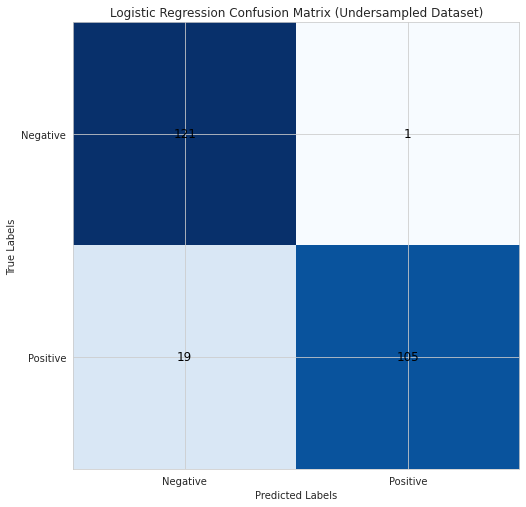


Random Forest Classifier:
Accuracy: 0.9308943089430894
F1 Score: 0.9288702928870292
Precision: 0.9652173913043478
Recall: 0.8951612903225806
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}


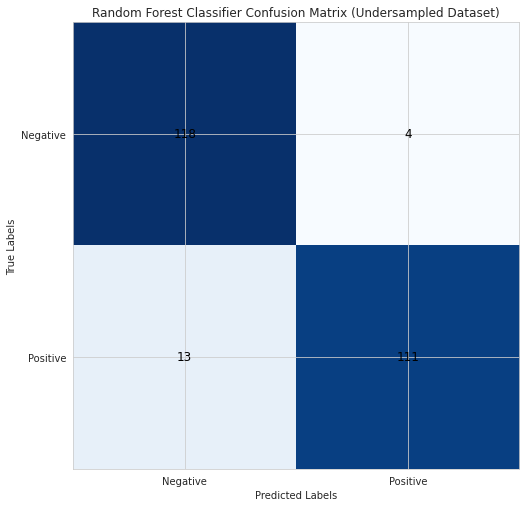


SVC:
Accuracy: 0.926829268292683
F1 Score: 0.923076923076923
Precision: 0.9818181818181818
Recall: 0.8709677419354839
{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


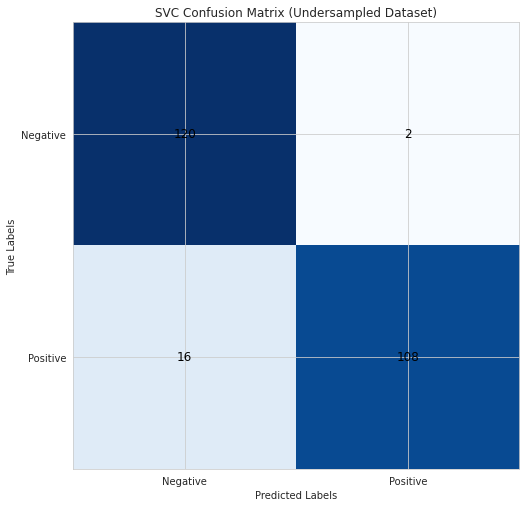


KNN Classifier:
Accuracy: 0.926829268292683
F1 Score: 0.9224137931034482
Precision: 0.9907407407407407
Recall: 0.8629032258064516
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


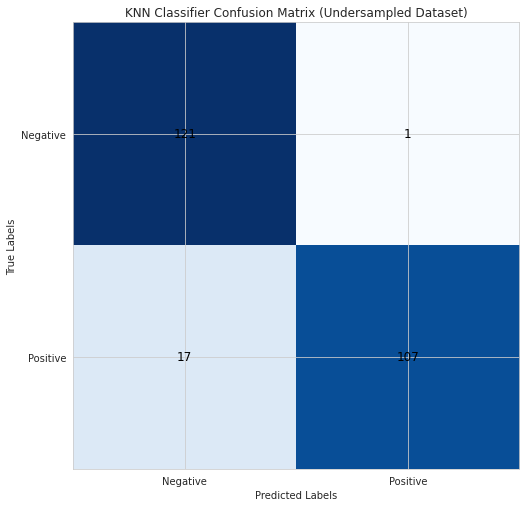


XGBoost Classifier:
Accuracy: 0.9186991869918699
F1 Score: 0.9166666666666667
Precision: 0.9482758620689655
Recall: 0.8870967741935484
{'learning_rate': 1, 'max_depth': 7, 'n_estimators': 100}


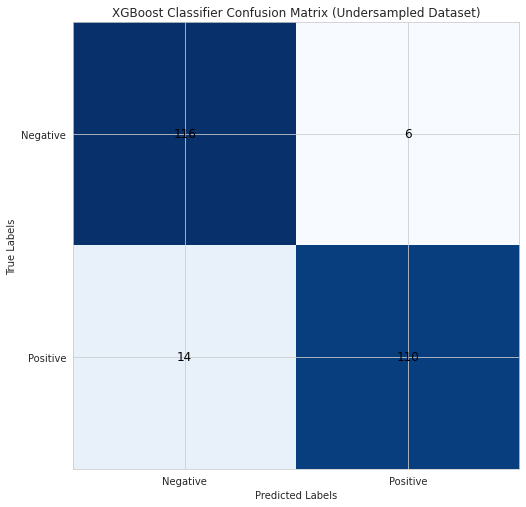


Decision Tree Classifier:
Accuracy: 0.9227642276422764
F1 Score: 0.9191489361702128
Precision: 0.972972972972973
Recall: 0.8709677419354839
{'max_depth': 2, 'min_samples_leaf': 8}


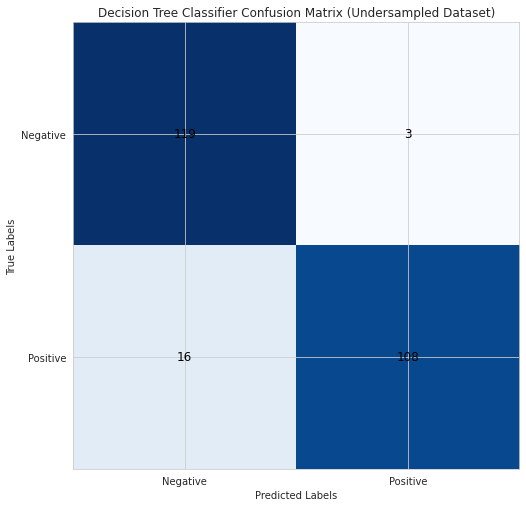

In [ ]:
models = {
    'Logistic Regression': {'model': LogisticRegression, 'best_params': logreg_hyperparam_tuning(X_new_train2, y_new_train2)},
    'Random Forest Classifier': {'model': RandomForestClassifier, 'best_params': rf_hyperparam_tuning(X_new_train2, y_new_train2)},
    'SVC': {'model': SVC, 'best_params': svc_hyperparam_tuning(X_new_train2, y_new_train2)},
    'KNN Classifier': {'model': KNeighborsClassifier, 'best_params': knn_hyperparam_tuning(X_new_train2, y_new_train2)},
    'XGBoost Classifier': {'model': XGBClassifier, 'best_params': xgb_hyperparam_tuning(X_new_train2, y_new_train2)},
    'Decision Tree Classifier': {'model': DecisionTreeClassifier, 'best_params': dt_hyperparam_tuning(X_new_train2, y_new_train2)},
    
}

datasets = {
    'Undersampled Dataset': (X_new_train2, y_new_train2, X_new_test2, y_new_test2)
}

evaluate_models(models, datasets)


Epoch 1/25
24/24 [==============================] - 9s 95ms/step - loss: 0.6290 - accuracy: 0.8059 - val_loss: 0.5324 - val_accuracy: 0.8425
Epoch 2/25
24/24 [==============================] - 0s 16ms/step - loss: 0.4759 - accuracy: 0.8418 - val_loss: 0.4069 - val_accuracy: 0.8638
Epoch 3/25
24/24 [==============================] - 0s 15ms/step - loss: 0.4043 - accuracy: 0.8650 - val_loss: 0.3741 - val_accuracy: 0.8653
Epoch 4/25
24/24 [==============================] - 0s 16ms/step - loss: 0.3783 - accuracy: 0.8721 - val_loss: 0.3544 - val_accuracy: 0.8674
Epoch 5/25
24/24 [==============================] - 0s 16ms/step - loss: 0.3562 - accuracy: 0.8769 - val_loss: 0.3374 - val_accuracy: 0.8725
Epoch 6/25
24/24 [==============================] - 0s 16ms/step - loss: 0.3342 - accuracy: 0.8845 - val_loss: 0.3224 - val_accuracy: 0.8801
Epoch 7/25
24/24 [==============================] - 0s 15ms/step - loss: 0.3154 - accuracy: 0.8891 - val_loss: 0.3120 - val_accuracy: 0.8836
Epoch 8/25
24

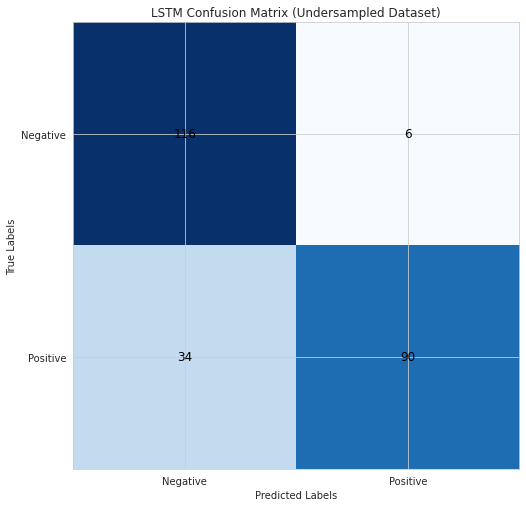

{'batch_size': 32, 'epochs': 25, 'hidden_layers': 3, 'units': 32}


In [ ]:
evaluate_model(rnn_model,X_new_train2,X_new_test2,y_new_train2,y_new_test2)
print(rnn_model)

## ROC curve

In [ ]:
# calculate and plot ROC curve
def roc_functions(models,datasets):
  for dataset_name, dataset in datasets.items():
    X_train, y_train, X_test, y_test = dataset
    print(f"Evaluating models on {dataset_name}:")
    for model_name, model in models.items():
      print(f"\n{model_name}:")
      best_params = model['best_params']
      model_obj = model['model'](**best_params)
      model_obj.fit(X_train, y_train)
      y_pred = model_obj.predict(X_test)
      fpr, tpr, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
      plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.title(f"{model_name} ROC Curve ({dataset_name})")
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend(loc='lower right')
      plt.show()

      print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Evaluating models on Undersampled Dataset:

Logistic Regression:


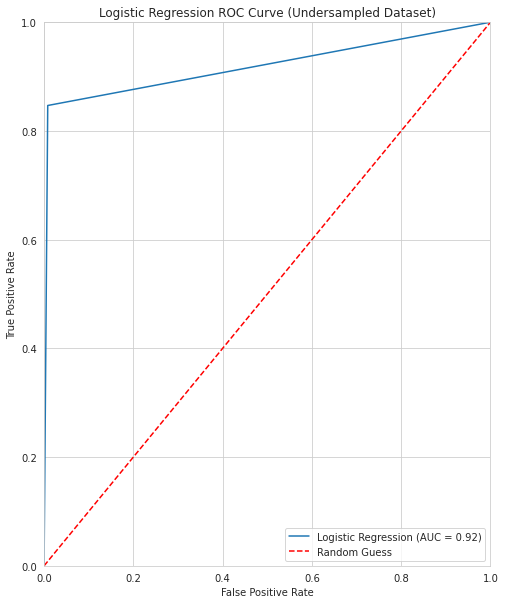

ROC AUC Score: 0.9192887361184559

Random Forest Classifier:


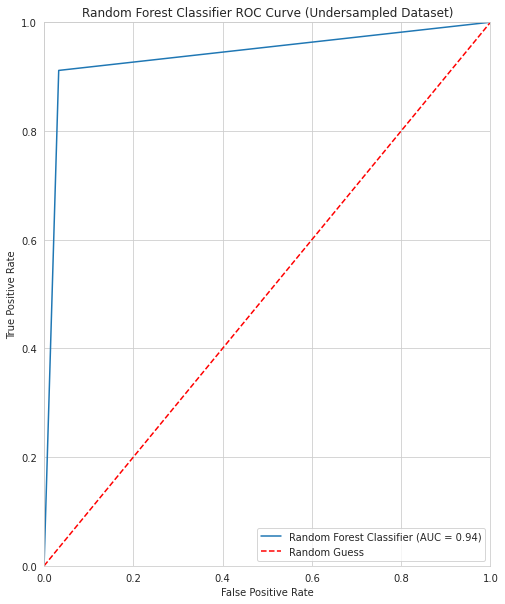

ROC AUC Score: 0.9392517186673716

SVC:


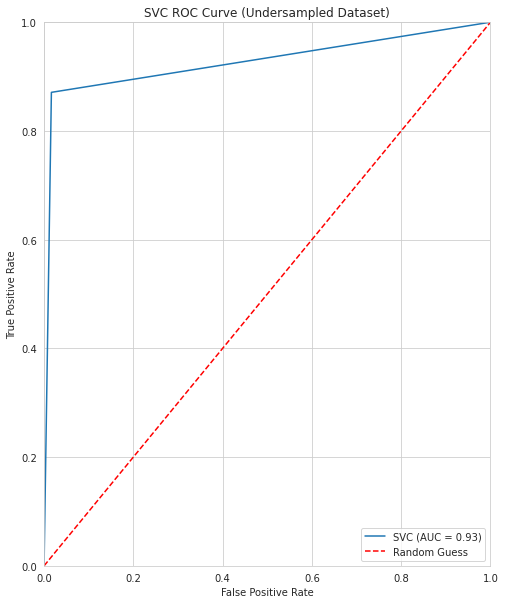

ROC AUC Score: 0.9272871496562666

KNN Classifier:


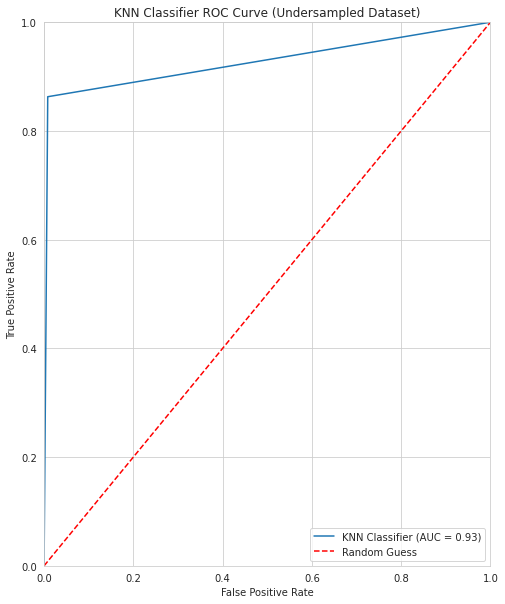

ROC AUC Score: 0.927353252247488

XGBoost Classifier:


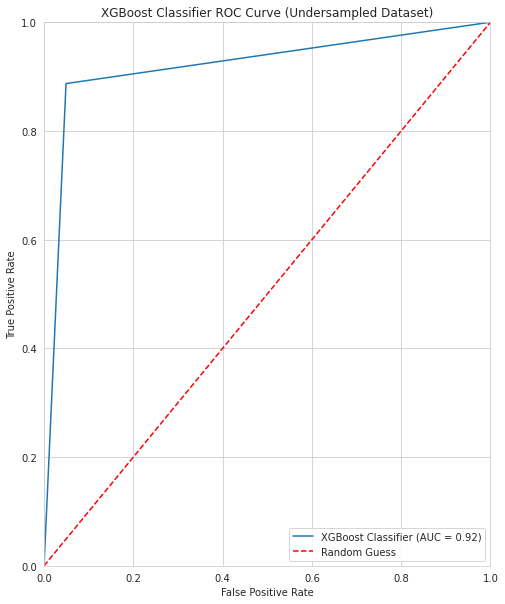

ROC AUC Score: 0.918958223162348

Decision Tree Classifier:


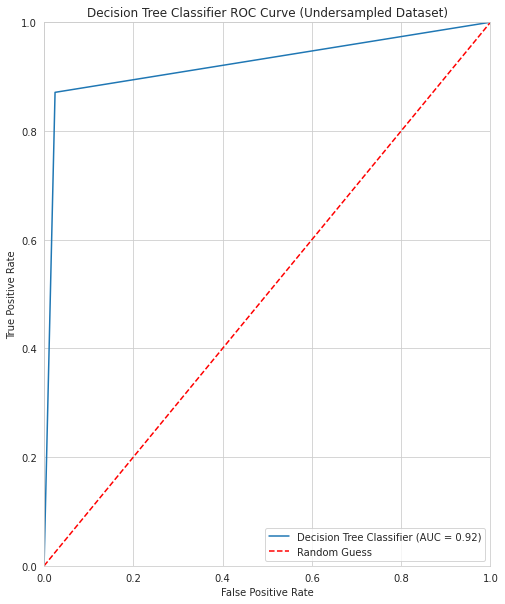

ROC AUC Score: 0.9231887890005288


In [ ]:
roc_functions(models,datasets)

In [ ]:
def roc_function(model, X_train, y_train, X_test, y_test):
    model_name = 'LSTM'
    dataset_name = 'Undersampled Dataset'  
    batch_size = rnn_model['batch_size']
    epochs = rnn_model['epochs']
    num_units = rnn_model['units']
    num_layers = rnn_model['hidden_layers']

    # Define the model
    model = Sequential()
    model.add(LSTM(num_units, input_shape=(8,1), return_sequences=True))
    for i in range(num_layers-1):
        model.add(LSTM(num_units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    pre = model.predict(X_new_test2)
    y_pred=[]
    for i in pre[:,0]:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(f"{model_name} ROC Curve ({dataset_name})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Epoch 1/25
24/24 [==============================] - 9s 68ms/step - loss: 0.6076 - accuracy: 0.7886 - val_loss: 0.4959 - val_accuracy: 0.8557
Epoch 2/25
24/24 [==============================] - 0s 11ms/step - loss: 0.4529 - accuracy: 0.8496 - val_loss: 0.3959 - val_accuracy: 0.8587
Epoch 3/25
24/24 [==============================] - 0s 12ms/step - loss: 0.4016 - accuracy: 0.8640 - val_loss: 0.3722 - val_accuracy: 0.8598
Epoch 4/25
24/24 [==============================] - 0s 11ms/step - loss: 0.3736 - accuracy: 0.8723 - val_loss: 0.3504 - val_accuracy: 0.8730
Epoch 5/25
24/24 [==============================] - 0s 11ms/step - loss: 0.3535 - accuracy: 0.8813 - val_loss: 0.3384 - val_accuracy: 0.8780
Epoch 6/25
24/24 [==============================] - 0s 12ms/step - loss: 0.3368 - accuracy: 0.8863 - val_loss: 0.3254 - val_accuracy: 0.8811
Epoch 7/25
24/24 [==============================] - 0s 12ms/step - loss: 0.3192 - accuracy: 0.8891 - val_loss: 0.3149 - val_accuracy: 0.8826
Epoch 8/25
24

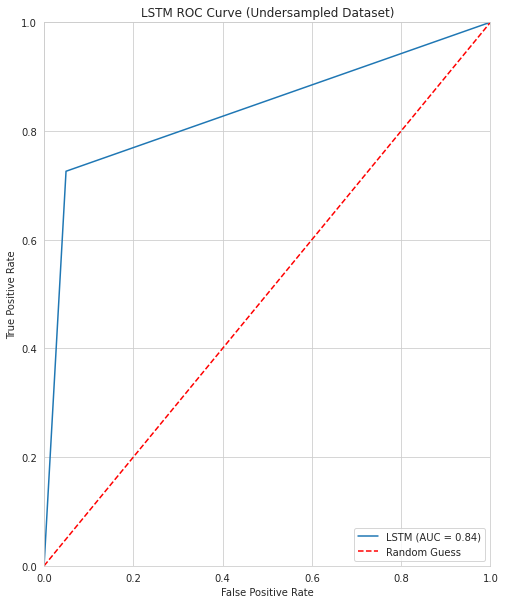

ROC AUC Score: 0.8383130618720254


In [ ]:
roc_function(rnn_model,X_new_train2, y_new_train2, X_new_test2, y_new_test2)